# Assignment 3
This assignment covers material on fitting data and solving ODEs.

The breakdown of the marks is as follows:

Q0: [1 mark]  
Q1: [7 marks]  
Q2: [4 marks]  
Q3: [4 marks]  
Q4: [4 marks]  
Q5: [10 marks]  

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

## Question 1: Linear least-square fitting
This questions asks you to write a function to find the best linear fit to a dataset and then apply that function to a few data sets. As always when testing a new piece of code, you should first test the code on a small data set for which you know the result. The other advantage of testing with a small dataset is that you can manually check each step of the calculation if you need to debug the code.

The normal equations for linear least-squares fitting are given by:  
  
$$
  \begin{align*}
    m \sum x_i^2 + c \sum x_i &= \sum x_i y_i \\
    m \sum x_i + cn &= \sum y_i
  \end{align*}
$$
  
Write these simultaneous equations in matrix for $A.x = b$, where $A$ is a $2\times2$ matrix and $x=\{m,c\}$ and $b$ are column vectors. Note that for a $2\times2$ matrix 
$$
A = \begin{pmatrix}
    a  & b \\
    c  & d 
\end{pmatrix}
$$
the inverse is given by
$$
A^{-1} = \frac{1}{ad-bc}\begin{pmatrix}
    d  & -b \\
    -c  & a 
\end{pmatrix}
$$

### Q1a.

Write a function that takes in two arrays of data for the x and y values and returns the values of $m$ and $c$ from for the linear least squares fit. Call the function `LinearLeastSquares`. You might want to use the function `np.dot(A,b)` which will take the dot product of a matrix, $A$ and a vector, $b$.

In [80]:
def LinearLeastSquares(data):
    x=data[:,0]
    y=data[:,1]

    a, b, c, d=np.sum(x**2), np.sum(x), np.sum(x), len(data)
    matrix=np.array([[a,b],[c,d]])

    det=(a*d)-(b*c)
    matrixinverse=(1/det)*np.array([[d,-b],[-c,a]])
    right=np.array([np.sum(x*y), np.sum(y)]) #the r.h.s of the normal equations
    #i.e in Ax=b, A=matrix, x= the column vector [m,c] and b=right
    
    #Function returns an array of [slope,y-intercept]
    return np.dot(matrixinverse,right)

Test you function with the data we looked at in the lecture, given below:

In [47]:
testdata  = np.array([[20.5, 765], [32.7, 826], [51.0, 873], [73.2,942], [95.7,1032]])

You should get the result $m=3.394872522996579$ and $c=702.1720627939267$. Explicitly print these values out.

In [48]:
print('m =',LinearLeastSquares(testdata)[0],'c =',LinearLeastSquares(testdata)[1])

m = 3.394872522996579 c = 702.1720627939267


### Q1b
Plot the data, using `plt.scatter(xi, yi)`, and the best fit curve over the full range of the data. Add a legend to the plot that labels the data and line with its equation.

In [81]:
def fit(data): #for simplicity
    x=data[:,0]
    y=data[:,1]
    m=LinearLeastSquares(data)[0]
    c=LinearLeastSquares(data)[1]

    plt.scatter(x,y, c='r', label='Data Points')
    plt.plot(x,m*x+c, label='Linear Least Squares fit: y='+str(round(m,3))+'x+'+str(round(c,3)))
    plt.legend()
    plt.grid()

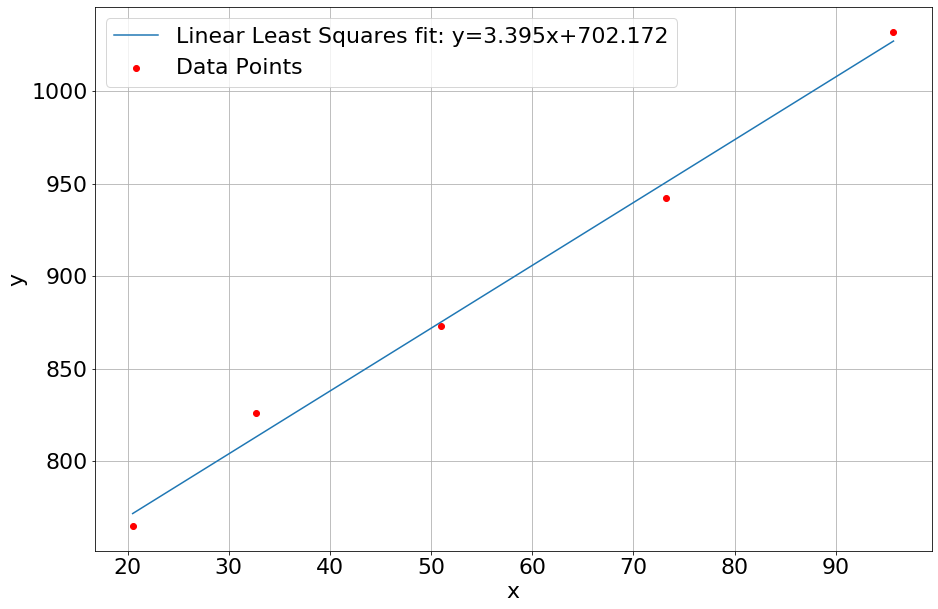

In [50]:
fit(testdata)
plt.xlabel('x')
plt.ylabel('y');

### Q1c
Load the data in `FitData1.dat` and fit the data using your `LinearLeastSquares` function. Print out the value of $m$ and $c$ to 5 decimal places, and plot the data and the fit.

m = -2.96255 c = 1.20807


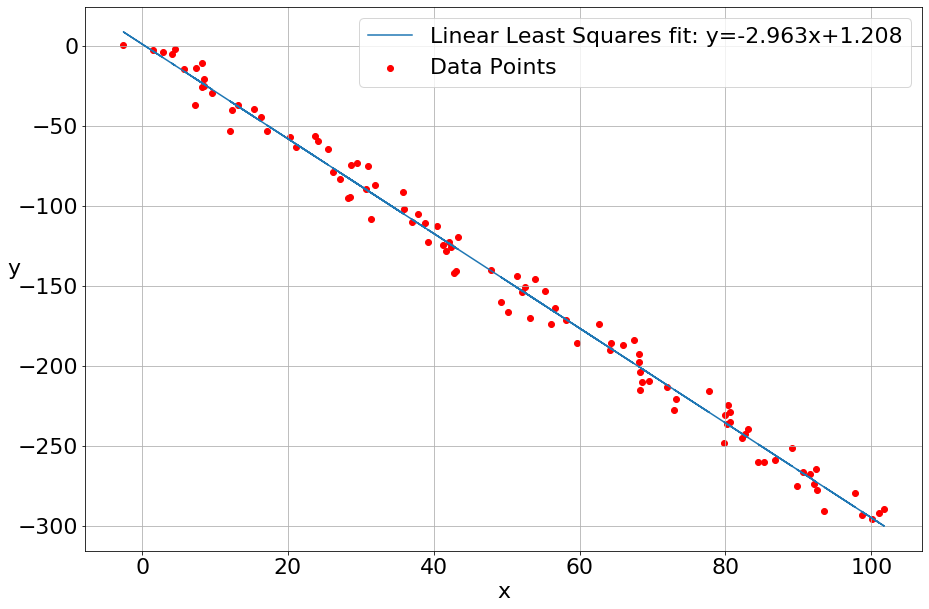

In [51]:
data1=np.loadtxt('FitData1.dat')

print('m = %.5f' % LinearLeastSquares(data1)[0],'c = %.5f' % LinearLeastSquares(data1)[1])

fit(data1)
plt.xlabel('x')
plt.ylabel('y', rotation=0);

### Q1d
Load the data in `FitData2.dat`. Determine whether this data is (approximately) power law or exponential. Depending on the answer, fit either the log or log-log of the data using your `LinearLeastSquares` function. Print the values of $m$ and $c$, and plot the (log or log-log of the) data and the fit. State explicitly what the approximate behaviour of the data is.

Data behaves approximately like power law
m = -5.00889720647055 c = 0.03189804360749804


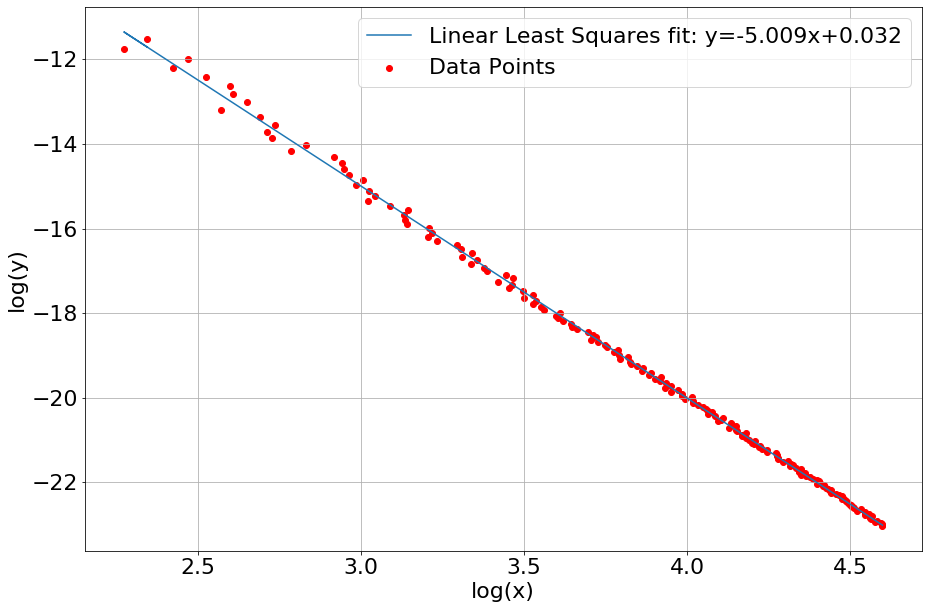

In [54]:
data2=np.loadtxt('FitData2.dat')

x=data2[:,0]
y=data2[:,1]

plt.scatter(np.log(x),np.log(y), c='r', label='Data Points')
print('Data behaves approximately like power law')

m=LinearLeastSquares(np.log(data2))[0]
c=LinearLeastSquares(np.log(data2))[1]

print('m =',LinearLeastSquares(np.log(data2))[0],'c =',LinearLeastSquares(np.log(data2))[1])

plt.plot(np.log(x),m*np.log(x)+c, label='Linear Least Squares fit: y='+str(round(m,3))+'x+'+str(round(c,3)))
plt.xlabel('log(x)')
plt.ylabel('log(y)')
plt.legend()
plt.grid()

Now:
- commit the notebook to your local repository
- push the changes to the GitHub

## Question 2: second-order ODEs

Use the below second-order version of the (fixed-step) RK2 function for this question.

In [55]:
def RK2(f, dx, x0, y0, imax):
    output = np.empty((imax, 3))
    i = 0
    xi = x0
    yi = y0
    while(i < imax):
        k1 = dx*f(xi, yi)
        k2 = dx*f(xi + dx, yi + k1)
        yi = yi + 0.5*(k1 + k2)
        xi += dx
        output[i, 0] = xi
        output[i, 1] = yi[0]
        output[i, 2] = yi[1]
        i += 1
    return output

### Q2a

Write the follow ODEs in first-order form and then solve them using the `RK2` function. Plot the numerical and analytic solution on the same plot (with a grid, labelling the axes and a legend).

$$
 y''(x) - y'(x) +\frac{1}{4} y(x) = -\sin(x)
$$
with $y(0) = 0, y'(0) = 73/100$. Find the numerical solution between $x=0$ and $x=9$.

This has the analytic solution:

$$
y(x) = \frac{1}{100} \left(-7 e^{x/2} x+64 e^{x/2}+48 \sin (x)-64 \cos (x)\right)
$$

For the numerical solution, start with a step size of $\Delta x = 0.1$. You may need to adjust this to get the numerical solution to agree with the analytic solution.

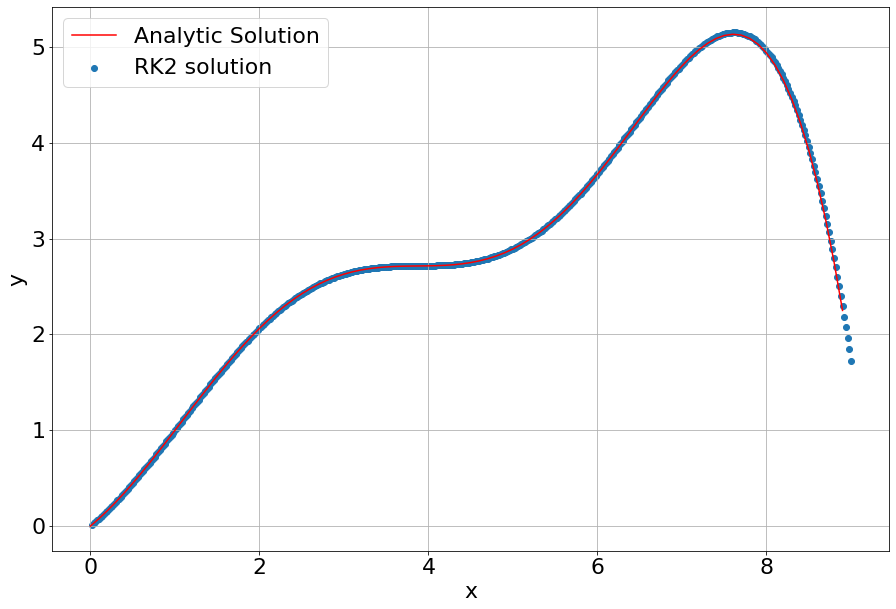

In [56]:
def f(x,y):
    f0=y[1]
    f1=y[1]-(1/4)*y[0]-np.sin(x)
    return np.array([f0,f1])

sol=RK2(f, 0.02, 0, [0,0.73], 450)

def y(x):
    return (1/100)*(-7*np.exp(x/2)*x+64*np.exp(x/2)+48*np.sin(x)-64*np.cos(x))

x=np.arange(0,9,0.1)

plt.scatter(sol[:,0],sol[:,1], label='RK2 solution')
plt.plot(x,y(x), label='Analytic Solution', c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

How small do you have to make the step size for the numerical solution to agree well with the analytic solution? What does this suggest about the equation?

- In order to get the numerical solution to agree with the analytic solution, the step size needs to be ~ 0.02 or lower. Since we require a step size so small, we can declare that the equation is stiff. Therefore, it may be more efficient to solve this ODE implicitly.

### Q2b

Write the follow ODEs in first-order form and then solve them using the `RK2` function. 

$$y''(x) + x y'(x) - 3\sin(x) y(x) = 0 $$

with $y(0) = 0, y'(0) = 1$

Plot the numerical solution (with a grid and labelling the axes) from $x=0\dots20$ with step size $\Delta x = 0.1$. There is no analytic solution to compare the solution against.

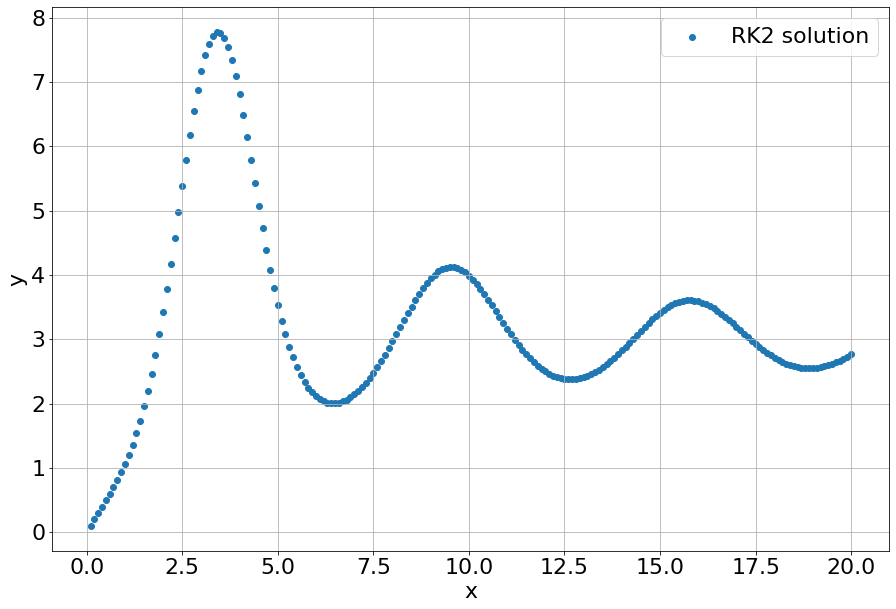

In [57]:
def f(x,y):
    f0=y[1]
    f1=-x*y[1]+3*np.sin(x)*y[0]
    return np.array([f0,f1])

sol=RK2(f, 0.1, 0, [0,1], 200)

plt.scatter(sol[:,0],sol[:,1], label='RK2 solution')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

Now:
- commit the changes to your notebook to your git local repository
- push the changes to the GitHub

## Question 3: equilbrium points

Using `solve_ivp` solve the non-linear first-order equation:

$$u'(x) = u(x)[2-u(x)]$$

Find and plot the solution between $x=0$ and $x=8$ for the following 8 initial values: $u(0) = \{0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5\}$. Draw a grid on the plot and label your axes.

You should find the systems with initial values $u(0) = \{0,2\}$ do not evolve as the right-hand side equals zero in these cases. These two values are called *equilibrium points*. You should observe that systems with $u(0) > 0$ should tend towards $u=2$ (and away from $u=0$) for large $x$. For this reason we say that $u=2$ is a stable equilbrium and $u=0$ is an unstable equilbrium.

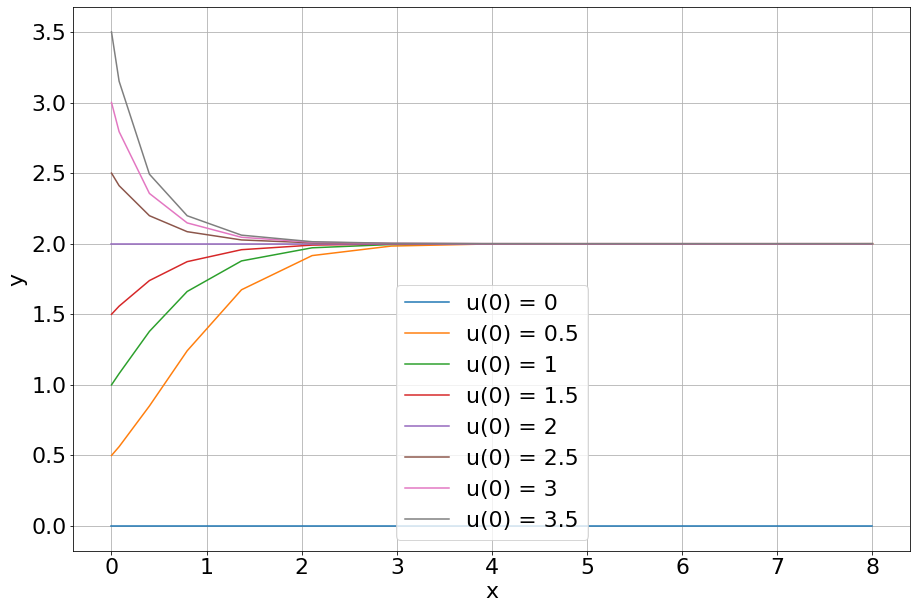

In [58]:
def f(x,y):
    return y*(2-y)

x=np.linspace(0,8,800)

sol=solve_ivp(f,[0,8],[0,0.5,1,1.5,2,2.5,3,3.5])
plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.plot(sol.t,sol.y[2])
plt.plot(sol.t,sol.y[3])
plt.plot(sol.t,sol.y[4])
plt.plot(sol.t,sol.y[5])
plt.plot(sol.t,sol.y[6])
plt.plot(sol.t,sol.y[7])
plt.legend(['u(0) = 0','u(0) = 0.5','u(0) = 1','u(0) = 1.5','u(0) = 2','u(0) = 2.5','u(0) = 3','u(0) = 3.5'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()


Now:
- commit the changes to your notebook to your git local repository
- push the changes to the GitHub

## Question 4: implicit methods

Write a function to solve the following first-order ODE using the backwards Euler method:

$$
y'(x) = -y(x) + x
$$
with $y(0) = 1$

This has the analytic solution
$$
 y(x) = -1 + 2e^{-x} + x
$$

Plot the numerical and analytics solutions. Show a grid, label your axes and show a legend.

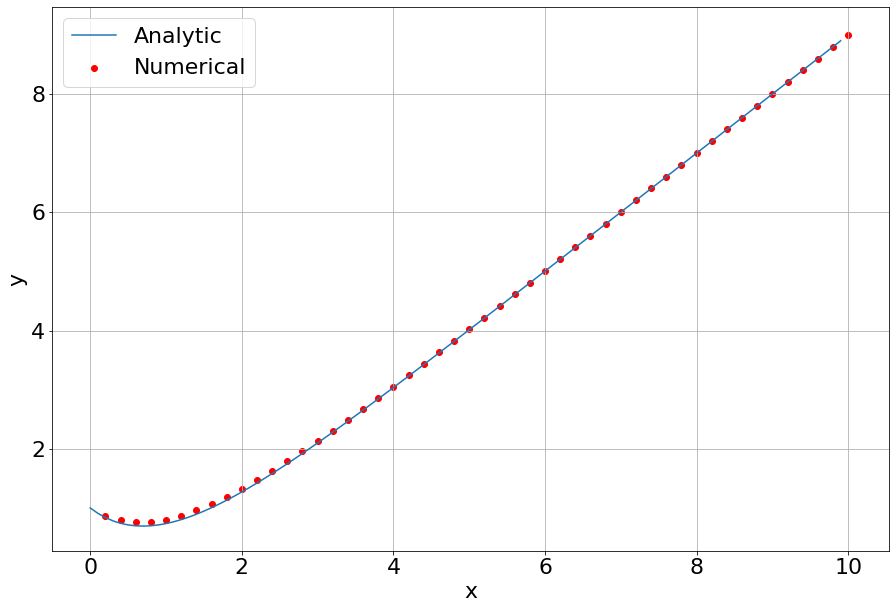

In [59]:
def BackwardsEuler(x0,y0,dx,imax):
    output = np.empty((imax, 2))
    i = 0
    xi = x0
    yi = y0
    while(i < imax):
        xi1= xi+dx
        yi = (yi+dx*(xi1))/(1+dx)
        xi += dx
        output[i, 0] = xi
        output[i, 1] = yi
        i += 1
    return output


def analytic(x):
    return -1+2*np.exp(-x)+x

sol=BackwardsEuler(0,1,0.2,50)

x=np.arange(0,10,0.1)

plt.plot(x,analytic(x))
plt.scatter(sol[:,0],sol[:,1], c='r')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Analytic','Numerical']);

Now:
- commit the changes to your notebook to your git local repository
- push the changes to the GitHub

## Question 5: solving boundary value problems (BVPs) via a shooting method

This question is harder than the earlier ones. Do not attempt it until you are happy with your answers to the previous questions.

As a reminder, the shooting method is a numerical method for solving Boundary Value Problems (BVP) of the form

$$y''(x)=f(x,y,y'),\;\;\;a<x<b$$

$$y(a)=y_a,\;\;\; y(b)=y_b$$

Consider now the Initial Value Problem (IVP)

$$y''(x)=f(x,y,y'),\;\;\;a<x<b$$

$$y(a)=y_a,\;\;\; y'(a)=\gamma$$

and denote its solution by $y_{\gamma}(x)$.


The shooting method looks for a root of the function

$$F(\gamma)=y_{\gamma}(b)-y_b,$$

that is, which value of $\gamma$ yields $y_{\gamma}(b)=y_b$. This method combines differential equation solving and root finding methods.

We will develop the algorithm as follows:

1. Write an efficient root finder
2. Define the function $F(\gamma)$ above
3. Find the root of $F(\gamma)$ which will solve our BVP
4. Package the whole algorithm up into a single function

We will check that each step is working along the way and use this algorithm to solve the following BVP:

$$w''(t) = \frac{3}{2}w(t)^2$$

with $w(0) = 4, w(1) = 1$

### Q5a. Write an efficient root finder

Write a function with signature ``FindRootSecant(f, x0, x1, tol)`` that implements the secant root finding method. You **must** write the function so that it only evaluates the function it's finding the root of once per loop (note this is different from the version of the code in the examples repository). It is important to have an efficient root finder as the function we want to root find on is expensive as it involves solving an ODE.

In [4]:
def FindRootSecant(f, x0, x1, tol):
    xim1=x0
    xi=x1
    #When the y values become sufficiently close, end the loop
    while np.abs(f(xi)-f(xim1))>tol:  
        fi=f(xi)
        xi1 = xi-fi*(xi-xim1)/(fi-f(xim1))
        xim1=xi
        xi=xi1

    return xi1

Test your ``FindRootSecant`` function on a cubic polynomial to check that it is working

In [5]:
#y=x^3-x^2+x-6 has a root at x=2 -> (2)^3-(2)^2+2-6 = 8-4+2-6 = 0

def f(x):
    return x**3-x**2+x-6

FindRootSecant(f,1.5,2.5,1e-7)

2.0

### Q5b. Define the function $F(\gamma)$

Write the ODE

$$w''(t) = \frac{3}{2}w(t)^2$$

with $w(0) = 4, w(1) = 1$

in first-order form and then define a function ``w(t,y)`` for use with ``solve_ivp``

In [15]:
def w(x,y):
    return np.array([y[1], (3/2)*y[0]**2])   

Assign the correct values values to $a,b,y_a,y_b$ and then define a function ``F(gamma)`` which solves the IVP using ``solve_ivp`` for the given $\gamma$, plots $w(t)$, and returns $w_\gamma(b) - w(b)$

In [29]:
a, ya=0, 4
b, yb= 1, 1

def F(gamma, plot=False):
    sol=solve_ivp(w,[a,b],[ya,gamma],rtol=1e-12, atol=1e-12)
    #If true, plot w(t)
    if plot==True:
        plt.plot(sol.t,sol.y[0])
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot(b,yb,'ro')
        plt.axhline(1,linestyle='dashed',color='red')
    #i.e return wy(b)-w(b)
    return sol.y[0][-1]-yb

Within a single cell, run your function $F$ for $\gamma = -7$ and $\gamma = -9$. This should plot two curves one of which has $F_\gamma>0$ and the other $F_\gamma <0$. Thus, by the intermediate value theorem we know that $F_\gamma$ has a root between $\gamma = -7$ and $\gamma = -9$.

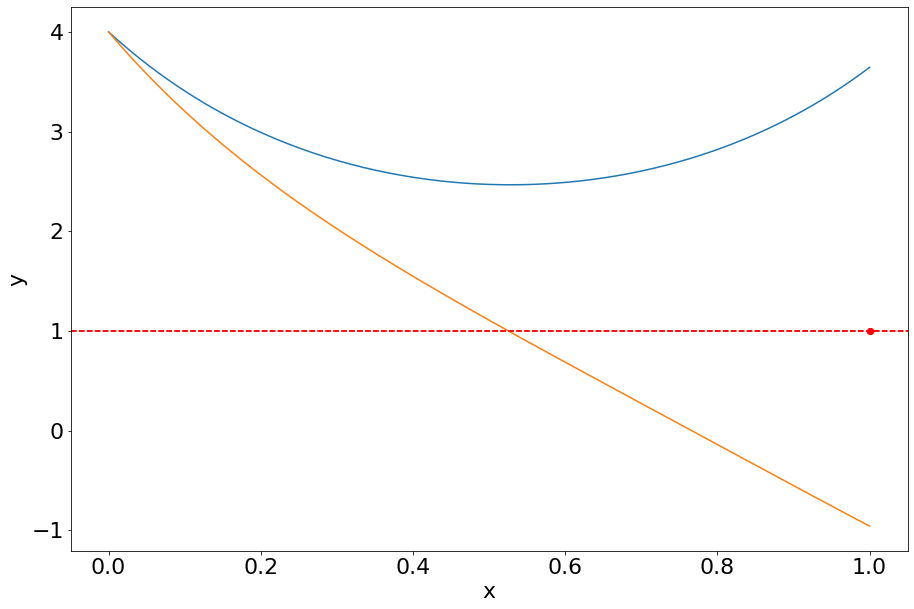

In [30]:
F(-7,True)
F(-9,True);

Using ``np.vectorize`` vectorize the function ``F`` and compute the $F(\gamma)$ for 50 values of $\gamma$ between -7 and -9. This will make a plot with 50 curves. Label the axes of the plot with $x$ and $y_\gamma(x)$ and use a grid.

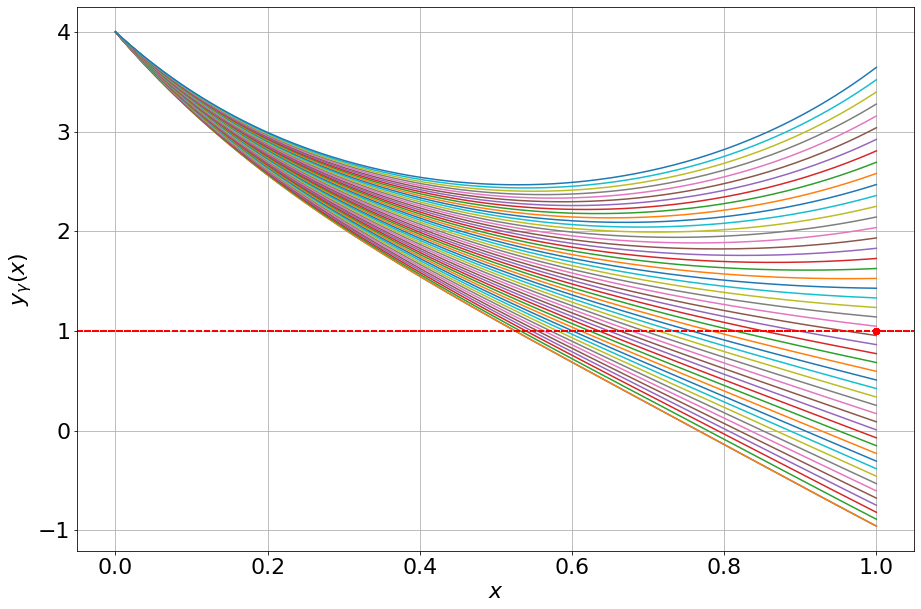

In [31]:
dyx0=np.linspace(-9,-7, 50)
np.vectorize(F)(dyx0,True)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y_\gamma(x)$');

Using the result from the last question plot $F(\gamma)$. Use a grid and label your axes.

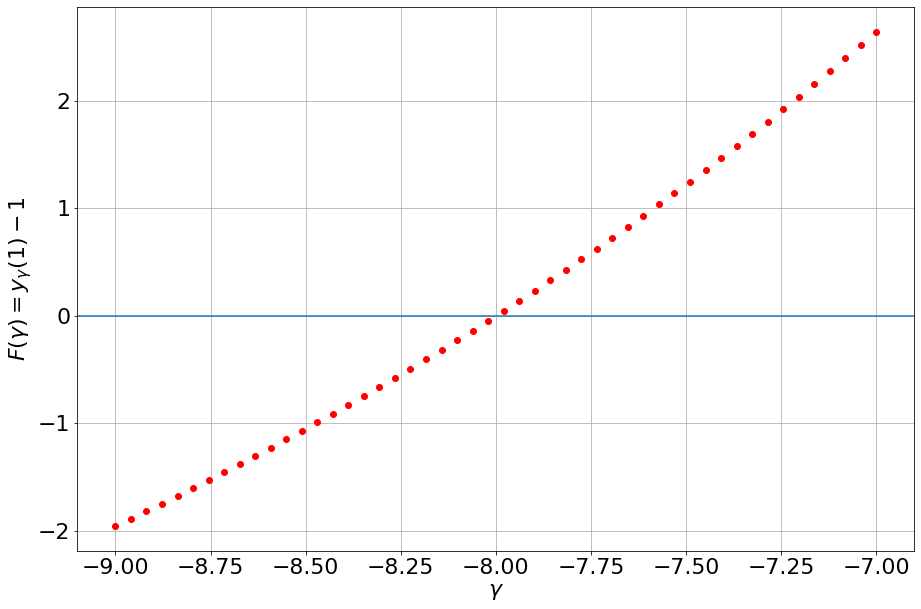

In [32]:
for i in dyx0: #dyx0 is our list of values between -7 and -9
    plt.plot(i,F(i), 'ro')
plt.axhline(0)
plt.grid()
plt.xlabel('$\gamma$')
plt.ylabel('$F(\gamma)=y_\gamma(1)-1$');

Finally, using your ``FindRootSecant`` function to find the root of $F(\gamma)$

In [75]:
FindRootSecant(F,-8.1,-7.8,1e-6)

-8.000000000001084

### Q5c: wrap it all up into a shooting method function

We now want to write a generic function with signature ``ShootingMethod(f, a, b, ya, yb, dya0, dya1, tol)`` that will work for any function and boundary values. A good way to do this is to define the function ``F`` within the ``ShootingMethod`` function. Complete the following skeleton of the function.

In [76]:
def ShootingMethod(f, a, b, ya, yb, dya0, dya1, tol):
    def F(dya):
        sol=solve_ivp(f,[a,b],[ya,dya],rtol=1e-12, atol=1e-12)
        return sol.y[0][-1]-yb
    
    xim1=dya0
    xi=dya1
    while np.abs(F(xi)-F(xim1))>tol:  
        fi=F(xi)
        xi1 = xi-fi*(xi-xim1)/(fi-F(xim1))
        xim1=xi
        xi=xi1

    return xi1

As our differential equation is second order there are two solutions which satisify the boundary conditions. One solution has $\gamma \simeq -8$ and the other has $\gamma\simeq-36$. Use your ``ShootingMethod`` function to find the value of $\gamma$ for each solution.

In [77]:
print("𝛾 =",ShootingMethod(w, 0, 1, 4, 1, -7, -9, 10e-12),"and 𝛾 =",ShootingMethod(w, 0, 1, 4, 1, -37, -35, 10e-12))

𝛾 = -8.000000000000561 and 𝛾 = -35.858548824859554


### Q5: Bonus (worth one bonus mark but max marks remains at 30)

Instead of explicitly defining a function within a function we can use something called [Lambda functions](https://www.w3schools.com/python/python_lambda.asp). Look these up and write a function called ``ShootingMethodLambda`` that implements the shoot method using a Lambda Function.

In [78]:
def ShootingMethodLambda(f, a, b, ya, yb, dya0, dya1, tol):
    F = lambda dya : solve_ivp(f,[a,b],[ya,dya],rtol=1e-12, atol=1e-12).y[0][-1]-yb
    xim1=dya0
    xi=dya1
    while np.abs(F(xi)-F(xim1))>tol:  
        fi=F(xi)
        xi1 = xi-fi*(xi-xim1)/(fi-F(xim1))
        xim1=xi
        xi=xi1

    return xi1

Test your ``ShootingMethodLambda`` function agrees with the result of the ``ShootingMethod`` function

In [79]:
print("𝛾 =",ShootingMethodLambda(w, 0, 1, 4, 1, -7, -9, 10e-12),"and 𝛾 =",ShootingMethodLambda(w, 0, 1, 4, 1, -37, -35, 10e-12))

𝛾 = -8.000000000000561 and 𝛾 = -35.858548824859554


Now:
- commit the changes to your notebook to your git local repository
- push the changes to the GitHub

Hand in your assignment via BrightSpace